Expected Annual Loss: 26196.56
Variance of Loss: 639587903.49
Standard Deviation: 25290.08


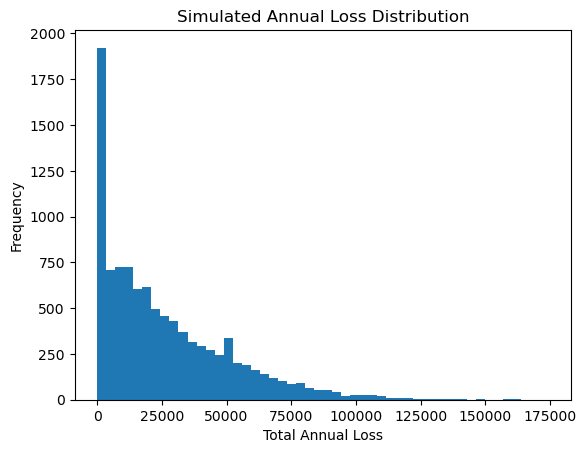

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson, lognorm

# ----------------------------
# PARAMETERS
# ----------------------------

np.random.seed(42)

n_simulations = 10000  # number of simulated policy years
lambda_claims = 2.0    # average number of claims per year
severity_mean = 10000  # average claim size
severity_sigma = 0.9   # volatility of claims

deductible = 1000
policy_limit = 50000

# ----------------------------
# SIMULATION
# ----------------------------

total_losses = []

for i in range(n_simulations):

    # simulate number of claims (frequency)
    num_claims = poisson.rvs(lambda_claims)

    total_loss = 0

    for j in range(num_claims):

        # simulate claim severity (lognormal distribution)
        claim = lognorm(s=severity_sigma, scale=np.exp(np.log(severity_mean))).rvs()

        # apply deductible
        claim = max(claim - deductible, 0)

        # apply policy limit
        claim = min(claim, policy_limit)

        total_loss += claim

    total_losses.append(total_loss)

# ----------------------------
# RESULTS
# ----------------------------

expected_loss = np.mean(total_losses)
variance_loss = np.var(total_losses)
std_dev_loss = np.std(total_losses)

print("Expected Annual Loss:", round(expected_loss, 2))
print("Variance of Loss:", round(variance_loss, 2))
print("Standard Deviation:", round(std_dev_loss, 2))

# ----------------------------
# VISUALIZATION
# ----------------------------

plt.hist(total_losses, bins=50)
plt.title("Simulated Annual Loss Distribution")
plt.xlabel("Total Annual Loss")
plt.ylabel("Frequency")
plt.show()

In [3]:
# Premium calculation with 20% loading
loading_factor = 0.20
premium = expected_loss * (1 + loading_factor)

print("Indicated Premium with 20% Loading:", round(premium, 2))

Indicated Premium with 20% Loading: 31435.87
